R environment

In [ ]:
suppressPackageStartupMessages({
    library(reticulate)
    library(ggplot2)
    library(Seurat)
    library(dplyr)
    library(tidyr)
    library(purrr)
    library(tibble)
    library(stringr)
    library(dittoSeq)
    library(future)
    library(data.table)
    plan("multiprocess", workers = 8)
    options(future.globals.maxSize = 1000 * 1024^5)
    options(stringsAsFactors = FALSE)
    set.seed(123)
})

In [ ]:
reference <- readRDS('data/coarse_annotation_GBmap.rds')
reference

An object of class Seurat 
5000 features across 338564 samples within 1 assay 
Active assay: RNA (5000 features, 0 variable features)
 2 dimensional reductions calculated: umap, umap3d

In [ ]:
malignant <- as.data.frame(readRDS('data/malignant_detailed_cellstates.rds')) %>% `colnames<-` ('ident')
myeloid <- as.data.frame(readRDS('data/TAMs_detailed_cellstates.rds')) %>% `colnames<-` ('ident')
lymphoid <- as.data.frame(readRDS('data/TILs_detailed_cellstates.rds')) %>% `colnames<-` ('ident')
vascular <- as.data.frame(readRDS('data/vascular_detailed_cellstates.rds')) %>% `colnames<-` ('ident')

In [ ]:
cells <- rbind(malignant,myeloid,lymphoid,vascular)
head(cells)

ident              
PJ017_0 MES-like no hypoxia
PJ017_3 MES-like no hypoxia
PJ017_4 AC-like            
PJ017_5 AC-like            
PJ017_7 MES-like no hypoxia
PJ017_8 MES-like no hypoxia

In [ ]:
glia_neuron <- subset(reference, idents = c('Neuronal/glial'))
other_immune <- subset(reference, subset = c(Leiden == '45' | 
                                             Leiden == '53' | 
                                             Leiden == '58')) # B/plasma and mast cells

For cell annotation of DCs, we considered the expression of cell type-specific marker genes identified using the Wilcoxon rank-sum test <br>
by comparing all cells within a specific cluster to all cells outside said cluster. In addition, the original annotation and gene signatures <br>
from Pombo-Antunes et al 2021 were taken into account to annotate this population on the GBmap)

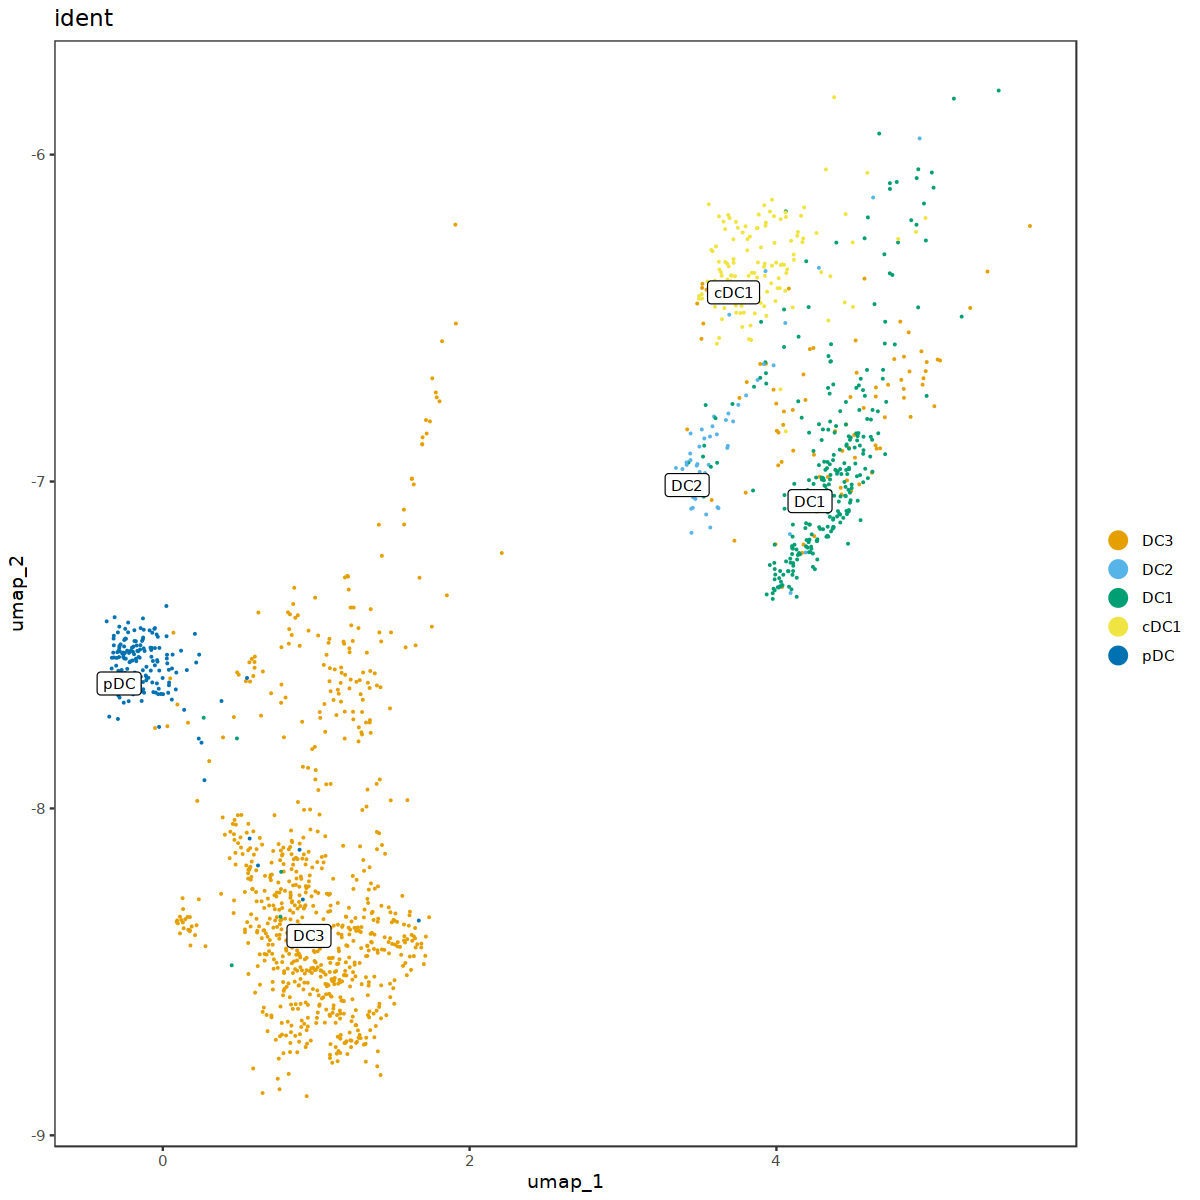

In [ ]:
dc <- subset(reference, subset = c(Leiden == '50' | Leiden == '55'))
Idents(dc) <- dc@meta.data$`celltype_original`

dc <- RenameIdents(dc, `nan` = "DC3",
                    `DC 4` = "DC3",
                    `B cells` = "DC3", 
                    `Immune cell` = "DC3", 
                    `DC 2` = "DC3", 
                    `DC 3` = "DC2", 
                    `DC` = "DC1", 
                    `TAM 2` = "cDC1", 
                    `Proliferating TAM` = "cDC1", 
                    `T cells` = "cDC1",
                    `Microglia` = "DC1",
                   `DC 1` = "DC1")

options(repr.plot.height = 10, repr.plot.width = 10)
dittoDimPlot(dc, 
             reduction.use = "umap", var = "ident", 
             do.label = TRUE, labels.size = 3, size = 0.5)

In [ ]:
final_ident <- rbind(cells, 
                     as.data.frame(Idents(glia_neuron)) %>% `colnames<-` ('ident'),
                     as.data.frame(Idents(other_immune)) %>% `colnames<-` ('ident'),
                    as.data.frame(Idents(dc)) %>% `colnames<-` ('ident'))
final_ident

ident              
PJ017_0               MES-like no hypoxia
PJ017_3               MES-like no hypoxia
PJ017_4               AC-like            
PJ017_5               AC-like            
PJ017_7               MES-like no hypoxia
PJ017_8               MES-like no hypoxia
PJ017_9               MES-like no hypoxia
PJ017_10              MES-like no hypoxia
PJ017_11              MES-like no hypoxia
PJ017_12              MES-like no hypoxia
PJ017_13              AC-like            
PJ017_14              MES-like no hypoxia
PJ017_15              MES-like no hypoxia
PJ017_18              AC-like            
PJ017_19              MES-like no hypoxia
PJ017_20              MES-like no hypoxia
PJ017_21              AC-like            
PJ017_22              MES-like no hypoxia
PJ017_23              MES-like no hypoxia
PJ017_24              MES-like no hypoxia
PJ017_25              MES-like no hypoxia
PJ017_26              AC-like            
PJ017_27              AC-like            
PJ017_28              MES-like no hypoxia
PJ017_29              MES-like no hypoxia
PJ017_30              MES-like no hypoxia
PJ017_31              MES-like hypoxia   
PJ017_32              MES-like no hypoxia
PJ017_33              MES-like no hypoxia
PJ017_35              MES-like hypoxia   
⋮                     ⋮                  
R5_TGAGGGAAGATTAGTG-2 pDC                
R5_TGAGGTTGTGTGGACA-2 pDC                
R5_TGCAGTATCTGAGAGG-2 pDC                
R5_TGCGATAAGAGCAACC-2 pDC                
R5_TGCTCCATCGCTACAA-2 cDC1               
R5_TGCTCGTCAGTCTGGC-2 cDC1               
R5_TGGAGAGGTAGGAAAG-2 cDC1               
R5_TGGAGGACATGCCGGT-2 cDC1               
R5_TGGAGGATCCTCCACA-2 cDC1               
R5_TGGATCACAGACGATG-2 cDC1               
R5_TGGGATTGTACCCACG-2 pDC                
R5_TGTCCTGTCGTTCTCG-2 pDC                
R5_TGTGAGTCAAACGTGG-2 pDC                
R5_TGTGTGAAGGCAGGGA-2 pDC                
R5_TGTTACTAGCATGGGT-2 cDC1               
R5_TTACCGCGTGAATATG-2 cDC1               
R5_TTAGGCATCGAGTGAG-2 pDC                
R5_TTAGGGTGTCTTCCGT-2 cDC1               
R5_TTCACCGGTGCCCTTT-2 pDC                
R5_TTCACCGTCTTTGGAG-2 cDC1               
R5_TTCACGCCAACTCCCT-2 cDC1               
R5_TTGAGTGCAAACGTGG-2 pDC                
R5_TTGATGGAGGAGGGTG-2 pDC                
R5_TTGATGGCACCTGAAT-2 pDC                
R5_TTGGGTAAGTGGAAGA-2 pDC                
R5_TTTACTGAGTGGCCTC-2 pDC                
R5_TTTATGCGTTAAAGTG-2 pDC                
R5_TTTCCTCTCCCTGTTG-2 cDC1               
R5_TTTCGATGTAAGACCG-2 cDC1               
R5_TTTGTTGGTCCAGAAG-2 pDC

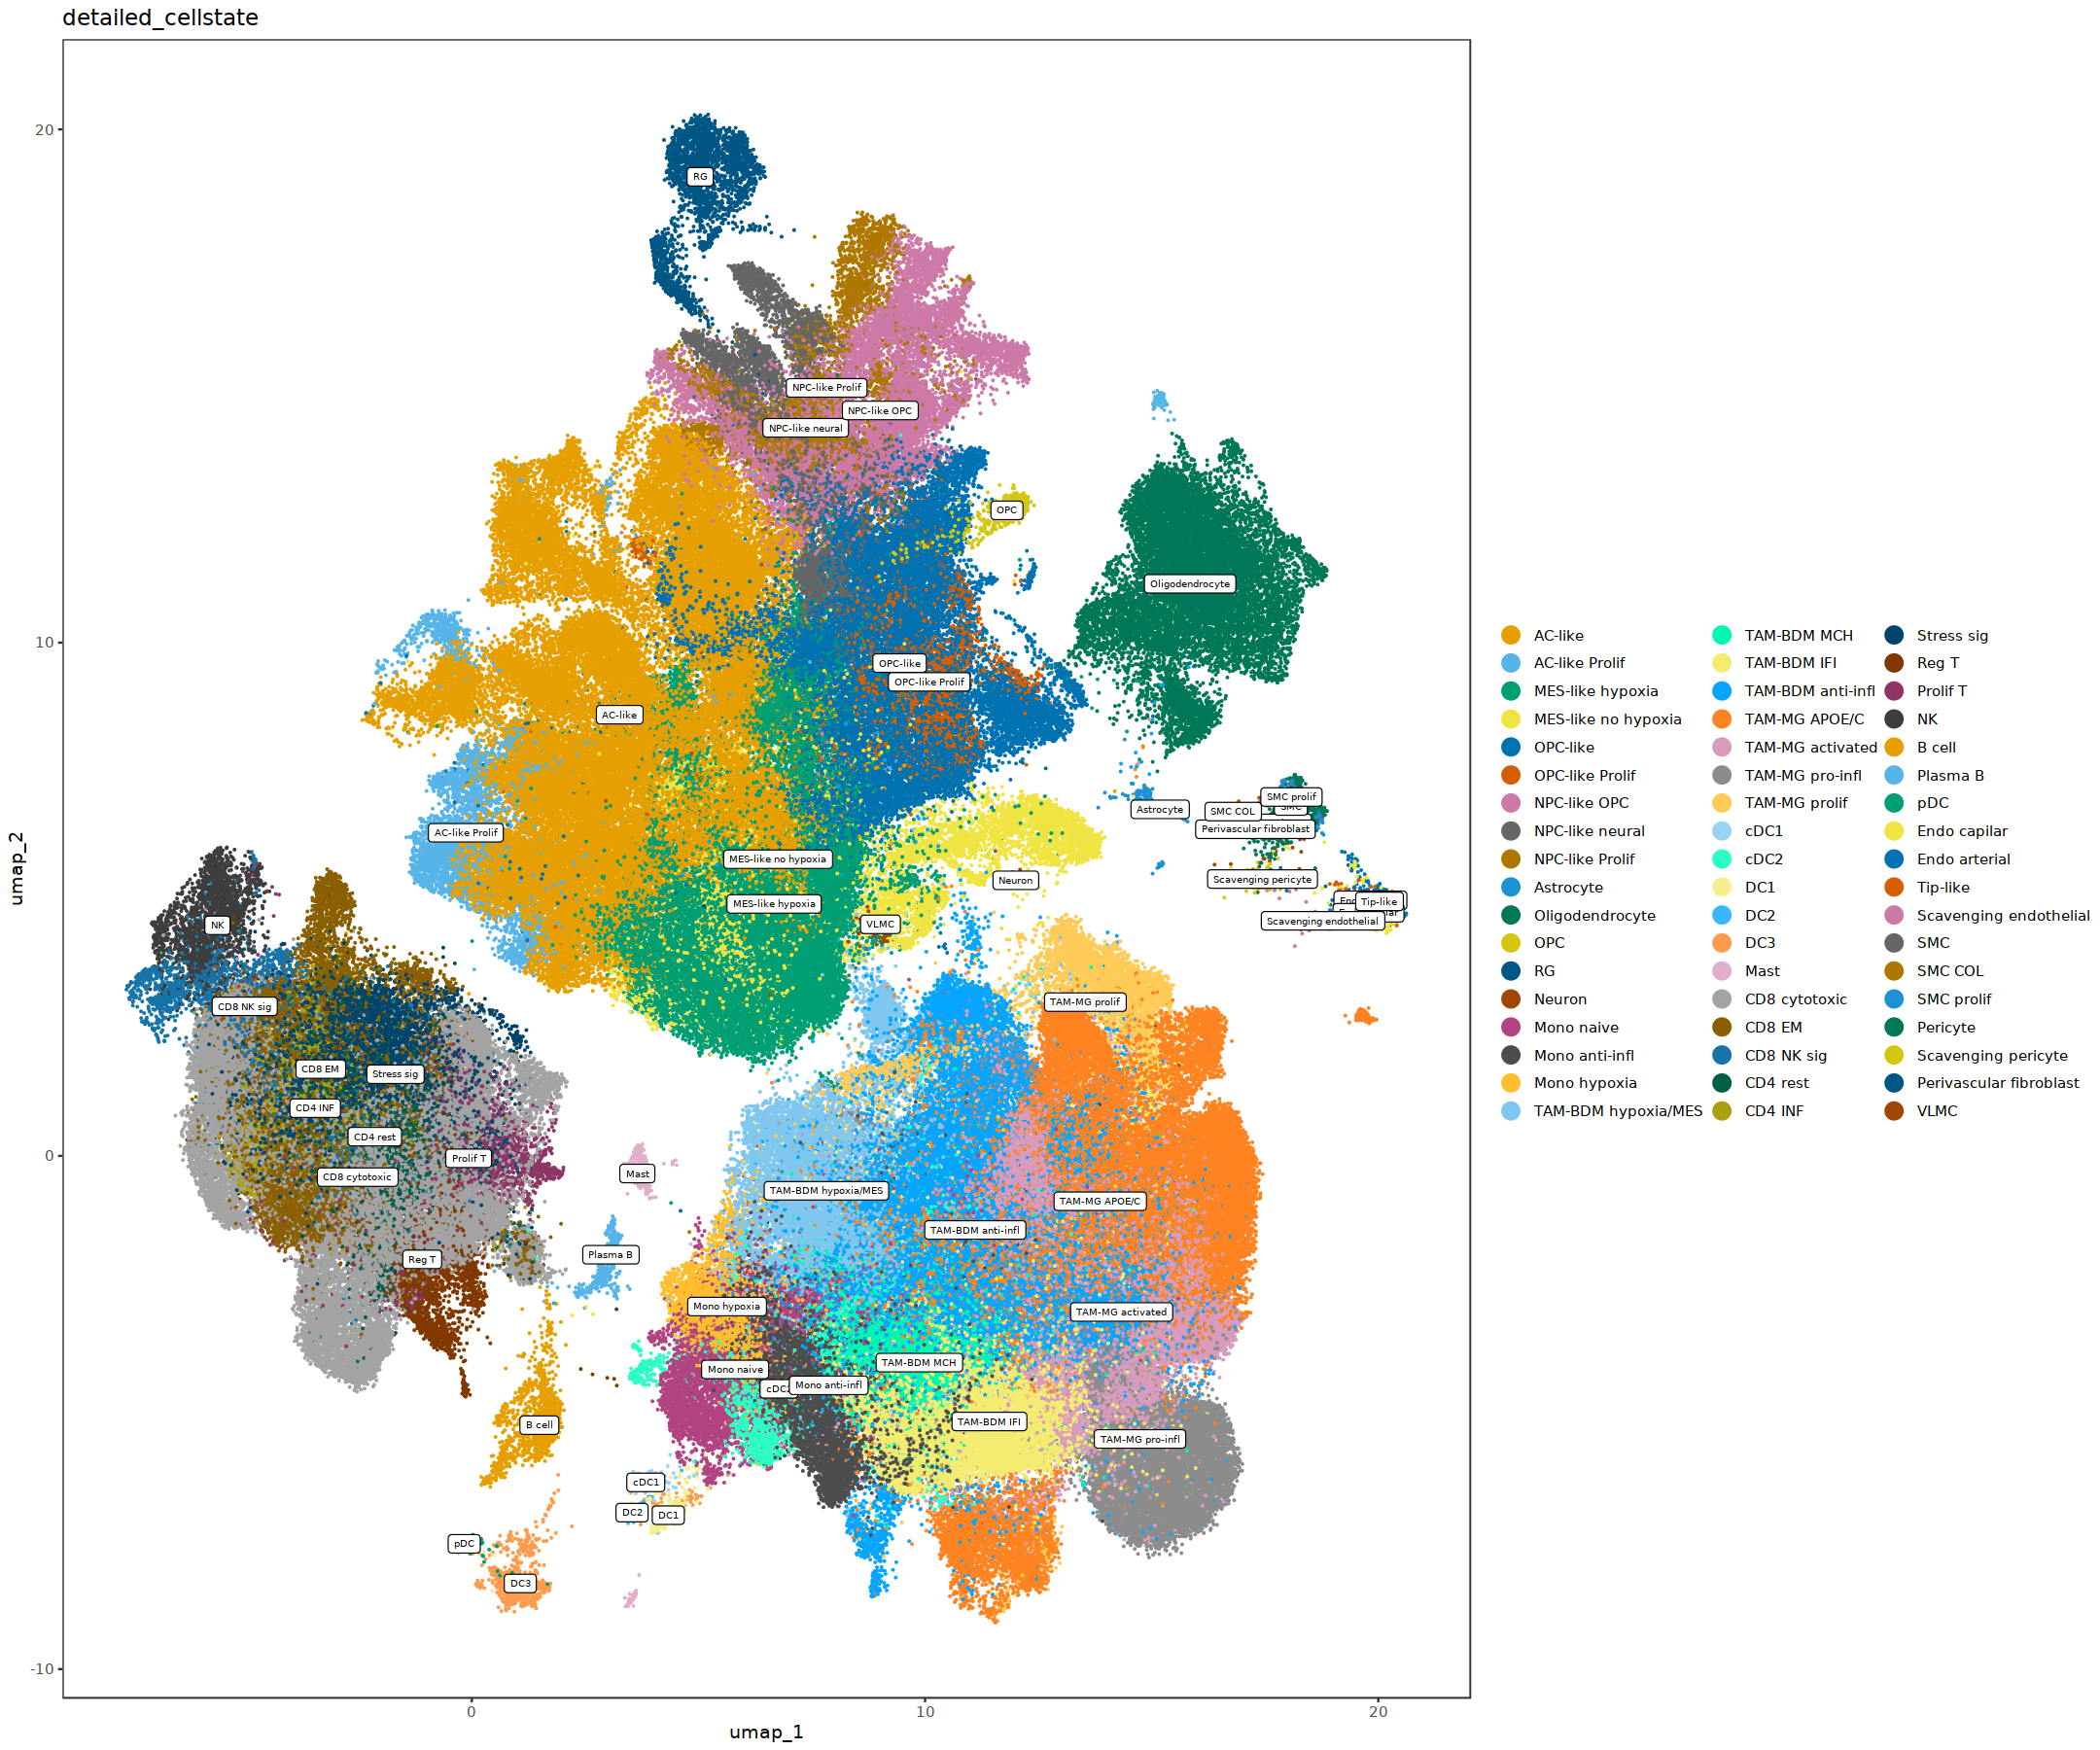

In [ ]:
reference$detailed_cellstate <- final_ident
reference@meta.data$detailed_cellstate <- factor(x = reference@meta.data$detailed_cellstate, 
                                                 levels = c('AC-like', 'AC-like Prolif','MES-like hypoxia','MES-like no hypoxia',
                                                                'OPC-like','OPC-like Prolif','NPC-like OPC','NPC-like neural','NPC-like Prolif',
                                                                'Astrocyte','Oligodendrocyte','OPC','RG','Neuron',
                                                                'Mono naive','Mono anti-infl','Mono hypoxia',
                                                                'TAM-BDM hypoxia/MES','TAM-BDM MCH','TAM-BDM IFI','TAM-BDM anti-infl',
                                                                'TAM-MG APOE/C', 'TAM-MG activated','TAM-MG pro-infl','TAM-MG prolif',
                                                                'cDC1','cDC2','DC1','DC2','DC3','Mast',
                                                                'CD8 cytotoxic','CD8 EM', 'CD8 NK sig','CD4 rest', 'CD4 INF', 
                                                                'Stress sig','Reg T','Prolif T','NK',
                                                                'B cell','Plasma B','pDC',
                                                                'Endo capilar', 'Endo arterial', 'Tip-like', 
                                                            'Scavenging endothelial', # endo
                                                            'SMC', 'SMC COL', 'SMC prolif', 
                                                            'Pericyte', 'Scavenging pericyte',
                                                            'Perivascular fibroblast', 'VLMC'))


options(repr.plot.height = 15, repr.plot.width = 18)
dittoDimPlot(reference, 
             reduction.use = "umap", var = "detailed_cellstate", 
             do.label = TRUE, labels.size = 2, size = 0.5, labels.repel = FALSE)

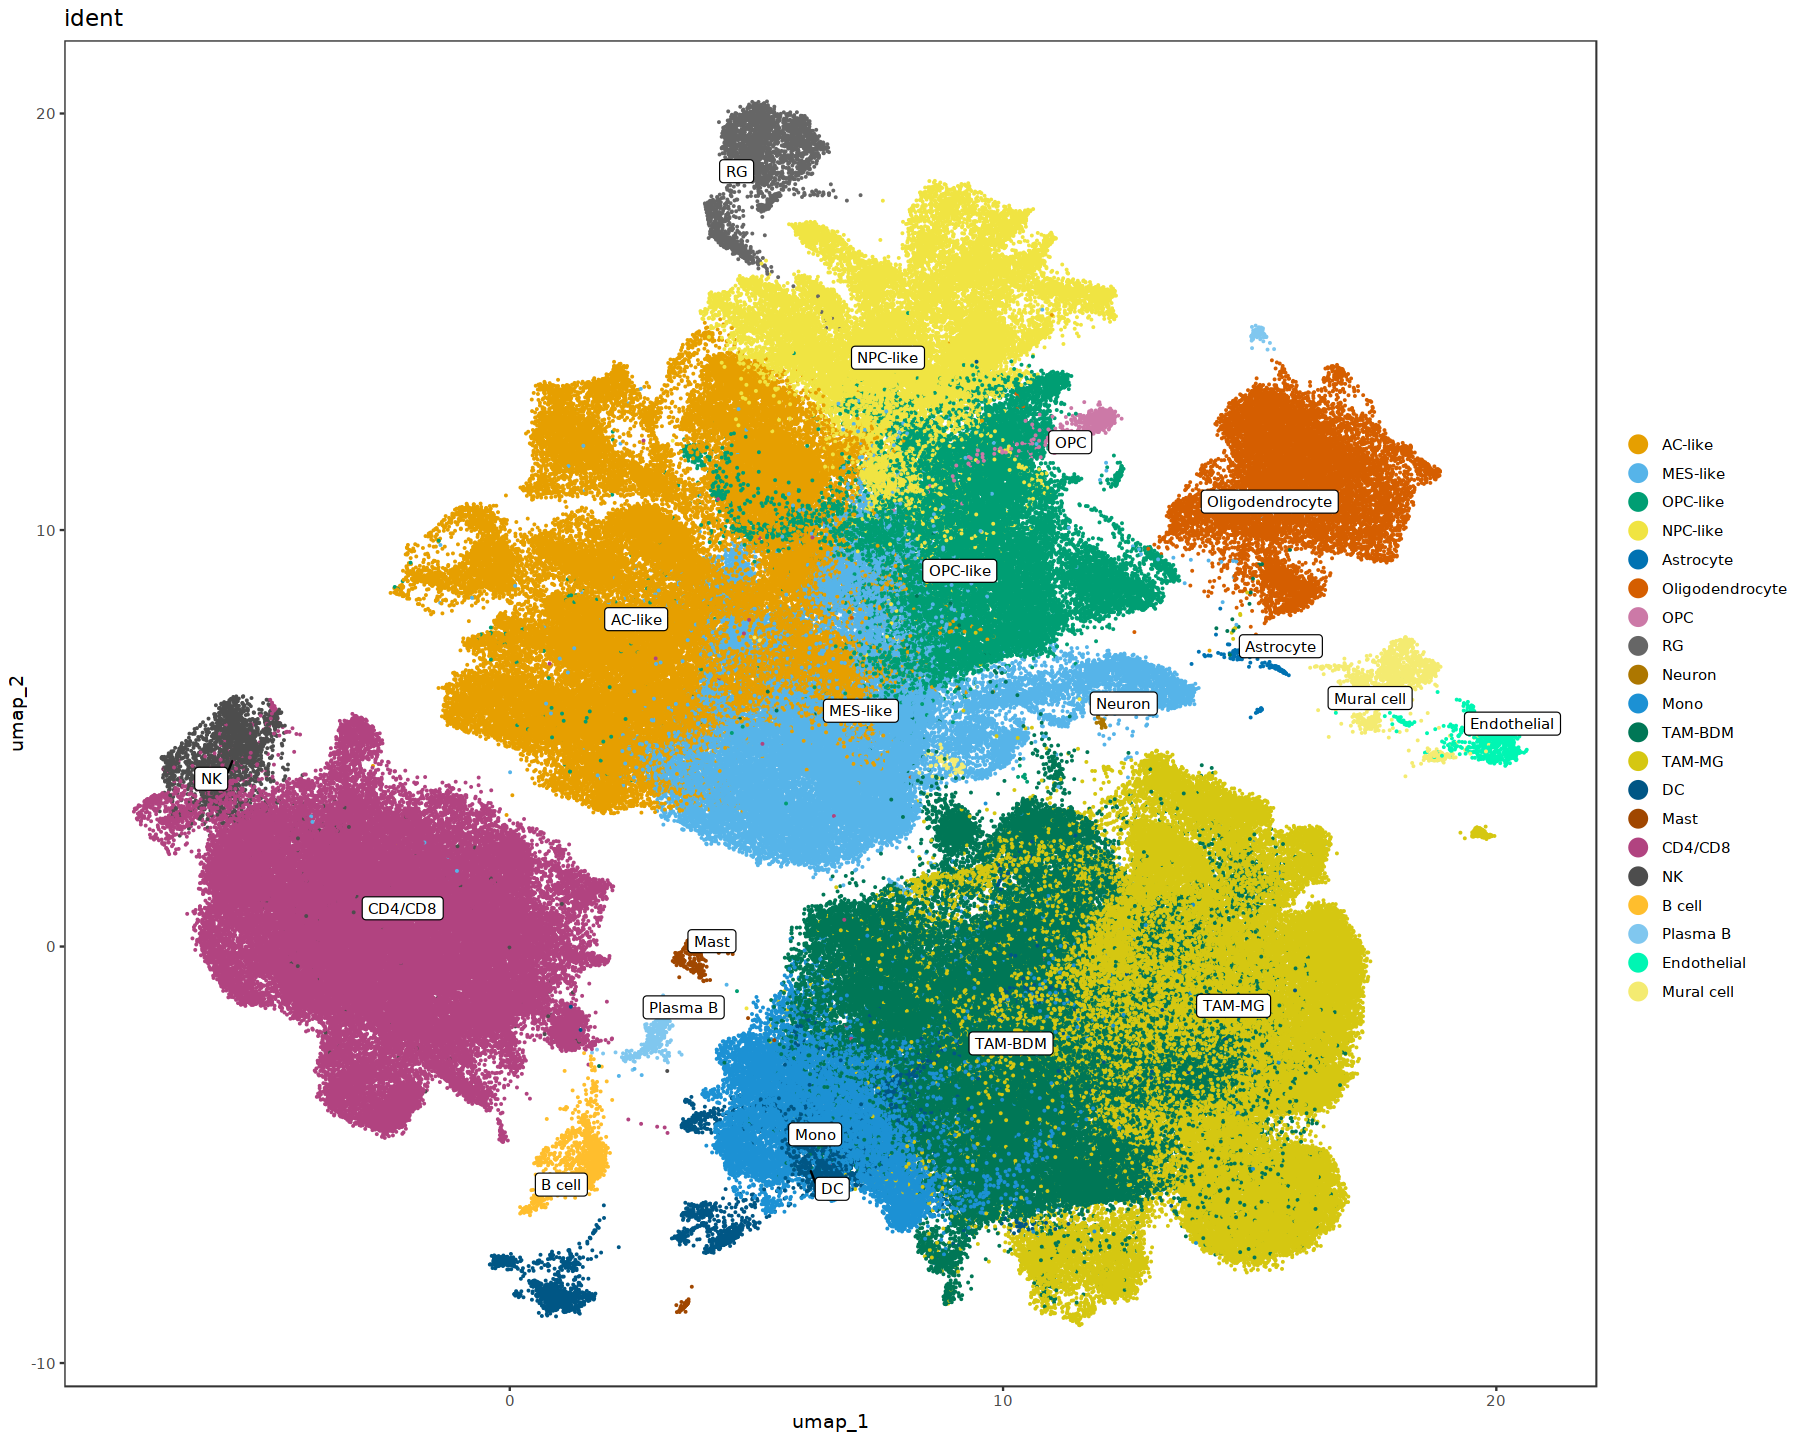

In [ ]:
Idents(reference) <- reference@meta.data$detailed_cellstate
reference <- RenameIdents(reference, `AC-like` = "AC-like",
                    `AC-like Prolif` = "AC-like",
                    `MES-like hypoxia` = "MES-like", 
                    `MES-like no hypoxia` = "MES-like", 
                    `OPC-like` = "OPC-like", 
                    `OPC-like Prolif` = "OPC-like", 
                    `NPC-like OPC` = "NPC-like", 
                    `NPC-like neural` = "NPC-like", 
                    `NPC-like Prolif` = "NPC-like", 
                    `Astrocyte` = "Astrocyte",
                    `Oligodendrocyte` = "Oligodendrocyte",
                    `OPC` = "OPC", 
                    `RG` = "RG", 
                    `Neuron` = "Neuron", 
                    `Mono naive` = "Mono",
                    `Mono anti-infl` = "Mono",
                    `Mono hypoxia` = "Mono", 
                    `TAM-BDM hypoxia/MES` = "TAM-BDM", 
                    `TAM-BDM MCH` = "TAM-BDM", 
                    `TAM-BDM IFI` = "TAM-BDM", 
                    `TAM-BDM anti-infl` = "TAM-BDM", 
                    `TAM-MG prolif` = "TAM-MG", 
                    `TAM-MG APOE/C` = "TAM-MG", 
                    `TAM-MG activated` = "TAM-MG",
                    `TAM-MG pro-infl` = "TAM-MG",
                    `cDC1` = "DC", 
                    `cDC2` = "DC", 
                    `DC1` = "DC", 
                    `DC2` = "DC",
                    `DC3` = "DC",
                    `Mast` = "Mast", 
                    `CD8 cytotoxic` = "CD4/CD8", 
                    `CD8 EM` = "CD4/CD8", 
                    `CD8 NK sig` = "CD4/CD8", 
                    `CD4 rest` = "CD4/CD8", 
                    `CD4 INF` = "CD4/CD8", 
                    `Stress sig` = "CD4/CD8", 
                    `Reg T` = "CD4/CD8",
                    `Prolif T` = "CD4/CD8",
                    `NK` = "NK", 
                    `B cell` = "B cell", 
                    `Plasma B` = "Plasma B", 
                    `pDC` = "DC",
                    `Endo capilar` = "Endothelial",
                    `Endo arterial` = "Endothelial", 
                    `Tip-like` = "Endothelial", 
                    `Scavenging endothelial` = "Mural cell" ,
                    `SMC` = "Mural cell",
                    `SMC COL` = "Mural cell",  
                    `SMC prolif` = "Mural cell", 
                    `Pericyte` = "Mural cell",
                    `Perivascular fibroblast` = "Mural cell", 
                    `Scavenging pericyte` = "Mural cell",
                          `Perivascular fibroblast` = "Mural cell",
                          `VLMC` = "Mural cell"
                        )

options(repr.plot.height = 12, repr.plot.width = 15)
dittoDimPlot(reference, 
             reduction.use = "umap", var = "ident", 
             do.label = TRUE, labels.size = 3, size = 0.5)

Exploring cancer gene signatures defined by Neftel et al 2019 and their ovarlay with our independent annotation

In [ ]:
# source https://www.ncbi.nlm.nih.gov/pubmed/31327527
signatures <- as.data.frame(data.table::fread(paste0('/hpc/pmc_stunnenberg/cruiz/scRNA/markers-and-databases/',
                                'GBM_public-data/Neftel2019/IDHwt.GBM.MetaModules.tsv')))

colnames(signatures)[colnames(signatures) == 'G1/S'] <- 'G1.S'
colnames(signatures)[colnames(signatures) == 'G2/M'] <- 'G2.M'

signatures

signatures.list <- list()

for(i in 1:length(colnames(signatures))){
  gene.names <- as.data.table(checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na=FALSE))
  signatures.list <- append(signatures.list, list(gene.names$Suggested.Symbol))
}

names(signatures.list) <- colnames(signatures)

signatures.list

MESlike2 MESlike1 AClike  OPClike NPClike1 NPClike2     G1.S     G2.M     
1  HILPDA   CHI3L1   CST3    BCAN    DLL3     STMN2        RRM2     CCNB1    
2  ADM      ANXA2    S100B   PLP1    DLL1     CD24         PCNA     CDC20    
3  DDIT3    ANXA1    SLC1A3  GPR17   SOX4     RND3         KIAA0101 CCNB2    
4  NDRG1    CD44     HEPN1   FIBIN   TUBB3    HMP19        HIST1H4C PLK1     
5  HERPUD1  VIM      HOPX    LHFPL3  HES6     TUBB3        MLF1IP   CCNA2    
6  DNAJB9   MT2A     MT3     OLIG1   TAGLN3   MIAT         GMNN     CKAP2    
7  TRIB3    C1S      SPARCL1 PSAT1   NEU4     DCX          RNASEH2A KNSTRN   
8  ENO2     NAMPT    MLC1    SCRG1   MARCKSL1 NSG1         MELK     RACGAP1  
9  AKAP12   EFEMP1   GFAP    OMG     CD24     ELAVL4       CENPK    CDCA3    
10 SQSTM1   C1R      FABP7   APOD    STMN1    MLLT11       TK1      TROAP    
11 MT1X     SOD2     BCAN    SIRT2   TCF12    DLX6-AS1     TMEM106C KIF2C    
12 ATF3     IFITM3   PON2    TNR     BEX1     SOX11        CDCA5    AURKA    
13 NAMPT    TIMP1    METTL7B THY1    OLIG1    NREP         CKS1B    CENPF    
14 NRN1     SPP1     SPARC   PHYHIPL MAP2     FNBP1L       CDC45    KPNA2    
15 SLC2A1   A2M      GATM    SOX2-OT FXYD6    TAGLN3       MCM3     KIF20A   
16 BNIP3    S100A11  RAMP1   NKAIN4  PTPRS    STMN4        CENPM    ECT2     
17 LGALS3   MT1X     PMP2    LPPR1   MLLT11   DLX5         AURKB    BUB1     
18 INSIG2   S100A10  AQP4    PTPRZ1  NPPA     SOX4         PKMYT1   CDCA8    
19 IGFBP3   FN1      DBI     VCAN    BCAN     MAP1B        MCM4     BUB1B    
20 PPP1R15A LGALS1   EDNRB   DBI     MEST     RBFOX2       ASF1B    TACC3    
21 VIM      S100A16  PTPRZ1  PMP2    ASCL1    IGFBPL1      GINS2    TTK      
22 PLOD2    CLIC1    CLU     CNP     BTG2     STMN1        MCM2     TUBA1C   
23 GBE1     MGST1    PMP22   TNS3    DCX      HN1          FEN1     NCAPD2   
24 SLC2A3   RCAN1    ATP1A2  LIMA1   NXPH1    TMEM161B-AS1 RRM1     ARL6IP1  
25 FTL      TAGLN2   S100A16 CA10    HN1      DPYSL3       DUT      KIF4A    
26 WARS     NPC2     HEY1    PCDHGC3 PFN2     SEPT3        RAD51AP1 CKAP2L   
27 ERO1L    SERPING1 PCDHGC3 CNTN1   SCG3     PKIA         MCM7     MZT1     
28 XPOT     C8orf4   TTYH1   SCD5    MYT1     ATP1B1       CCNE2    KIFC1    
29 HSPA5    EMP1     NDRG2   P2RX7   CHD7     DYNC1I1      ZWINT    SPAG5    
30 GDF15    APOE     PRCP    CADM2   GPR56    CD200        NA       ANP32E   
31 ANXA2    CTSB     ATP1B2  TTYH1   TUBA1A   SNAP25       NA       KIF11    
32 EPAS1    C3       AGT     FGF12   PCBP4    PAK3         NA       PSRC1    
33 LDHA     LGALS3   PLTP    TMEM206 ETV1     NDRG4        NA       TUBB4B   
34 P4HA1    MT1E     GPM6B   NEU4    SHD      KIF5A        NA       SMC4     
35 SERTAD1  EMP3     F3      FXYD6   TNR      UCHL1        NA       MXD3     
36 PFKP     SERPINA3 RAB31   RNF13   AMOTL2   ENO2         NA       CDC25B   
37 PGK1     ACTN1    PPAP2B  RTKN    DBN1     KIF5C        NA       OIP5     
38 EGLN3    PRDX6    ANXA5   GPM6B   HIP1     DDAH2        NA       REEP4    
39 SLC6A6   IGFBP7   TSPAN7  LMF1    ABAT     TUBB2A       NA       FOXM1    
40 CA9      SERPINE1 NA      ALCAM   ELAVL4   LBH          NA       TMPO     
41 BNIP3L   PLP2     NA      PGRMC1  LMF1     LOC150568    NA       GPSM2    
42 RPL21    MGP      NA      HRASLS  GRIK2    TCF4         NA       HMGB3    
43 TRAM1    CLIC4    NA      BCAS1   SERINC5  GNG3         NA       ARHGAP11A
44 UFM1     GFPT2    NA      RAB31   TSPAN13  NFIB         NA       RANGAP1  
45 ASNS     GSN      NA      PLLP    ELMO1    DPYSL5       NA       H2AFZ    
46 GOLT1B   NNMT     NA      FABP5   GLCCI1   CRABP1       NA       NA       
47 ANGPTL4  TUBA1C   NA      NLGN3   SEZ6L    DBN1         NA       NA       
48 SLC39A14 GJA1     NA      SERINC5 LRRN1    NFIX         NA       NA       
49 CDKN1A   TNFRSF1A NA      EPB41L2 SEZ6     CEP170       NA       NA       
50 HSPA9    WWTR1    NA      GPR37L1 SOX11    BLCAP        NA       NA

Maps last updated on: Thu Mar 25 08:36:49 2021

Warning message in checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na = FALSE):
“x contains non-approved gene symbols”
Maps last updated on: Thu Mar 25 08:36:49 2021

Warning message in checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na = FALSE):
“x contains non-approved gene symbols”
Maps last updated on: Thu Mar 25 08:36:49 2021

Warning message in checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na = FALSE):
“x contains non-approved gene symbols”
Maps last updated on: Thu Mar 25 08:36:49 2021

Warning message in checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na = FALSE):
“x contains non-approved gene symbols”
Maps last updated on: Thu Mar 25 08:36:49 2021

Warning message in checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na = FALSE):
“x contains non-approved gene symbols”
Maps last updated on: Thu Mar 25 08:36:49 2021

Warning message in checkGeneSymbols(na.omit(signatures[[i]]), unmapped.as.na = FAL

$MESlike2
 [1] "HILPDA"   "ADM"      "DDIT3"    "NDRG1"    "HERPUD1"  "DNAJB9"  
 [7] "TRIB3"    "ENO2"     "AKAP12"   "SQSTM1"   "MT1X"     "ATF3"    
[13] "NAMPT"    "NRN1"     "SLC2A1"   "BNIP3"    "LGALS3"   "INSIG2"  
[19] "IGFBP3"   "PPP1R15A" "VIM"      "PLOD2"    "GBE1"     "SLC2A3"  
[25] "FTL"      "WARS1"    "ERO1A"    "XPOT"     "HSPA5"    "GDF15"   
[31] "ANXA2"    "EPAS1"    "LDHA"     "P4HA1"    "SERTAD1"  "PFKP"    
[37] "PGK1"     "EGLN3"    "SLC6A6"   "CA9"      "BNIP3L"   "RPL21"   
[43] "TRAM1"    "UFM1"     "ASNS"     "GOLT1B"   "ANGPTL4"  "SLC39A14"
[49] "CDKN1A"   "HSPA9"   

$MESlike1
 [1] "CHI3L1"   "ANXA2"    "ANXA1"    "CD44"     "VIM"      "MT2A"    
 [7] "C1S"      "NAMPT"    "EFEMP1"   "C1R"      "SOD2"     "IFITM3"  
[13] "TIMP1"    "SPP1"     "A2M"      "S100A11"  "MT1X"     "S100A10" 
[19] "FN1"      "LGALS1"   "S100A16"  "CLIC1"    "MGST1"    "RCAN1"   
[25] "TAGLN2"   "NPC2"     "SERPING1" "TCIM"     "EMP1"     "APOE"    
[31] "CTSB"     "C3"       "LGALS3"   "MT1E"     "EMP3"     "SERPINA3"
[37] "ACTN1"    "PRDX6"    "IGFBP7"   "SERPINE1" "PLP2"     "MGP"     
[43] "CLIC4"    "GFPT2"    "GSN"      "NNMT"     "TUBA1C"   "GJA1"    
[49] "TNFRSF1A" "WWTR1"   

$AClike
 [1] "CST3"    "S100B"   "SLC1A3"  "HEPN1"   "HOPX"    "MT3"     "SPARCL1"
 [8] "MLC1"    "GFAP"    "FABP7"   "BCAN"    "PON2"    "METTL7B" "SPARC"  
[15] "GATM"    "RAMP1"   "PMP2"    "AQP4"    "DBI"     "EDNRB"   "PTPRZ1" 
[22] "CLU"     "PMP22"   "ATP1A2"  "S100A16" "HEY1"    "PCDHGC3" "TTYH1"  
[29] "NDRG2"   "PRCP"    "ATP1B2"  "AGT"     "PLTP"    "GPM6B"   "F3"     
[36] "RAB31"   "PLPP3"   "ANXA5"   "TSPAN7" 

$OPClike
 [1] "BCAN"    "PLP1"    "GPR17"   "FIBIN"   "LHFPL3"  "OLIG1"   "PSAT1"  
 [8] "SCRG1"   "OMG"     "APOD"    "SIRT2"   "TNR"     "THY1"    "PHYHIPL"
[15] "SOX2-OT" "NKAIN4"  "PLPPR1"  "PTPRZ1"  "VCAN"    "DBI"     "PMP2"   
[22] "CNP"     "TNS3"    "LIMA1"   "CA10"    "PCDHGC3" "CNTN1"   "SCD5"   
[29] "P2RX7"   "CADM2"   "TTYH1"   "FGF12"   "PACC1"   "NEU4"    "FXYD6"  
[36] "RNF13"   "RTKN"    "GPM6B"   "LMF1"    "ALCAM"   "PGRMC1"  "PLAAT1" 
[43] "BCAS1"   "RAB31"   "PLLP"    "FABP5"   "NLGN3"   "SERINC5" "EPB41L2"
[50] "GPR37L1"

$NPClike1
 [1] "DLL3"     "DLL1"     "SOX4"     "TUBB3"    "HES6"     "TAGLN3"  
 [7] "NEU4"     "MARCKSL1" "CD24"     "STMN1"    "TCF12"    "BEX1"    
[13] "OLIG1"    "MAP2"     "FXYD6"    "PTPRS"    "MLLT11"   "NPPA"    
[19] "BCAN"     "MEST"     "ASCL1"    "BTG2"     "DCX"      "NXPH1"   
[25] "JPT1"     "PFN2"     "SCG3"     "MYT1"     "CHD7"     "ADGRG1"  
[31] "TUBA1A"   "PCBP4"    "ETV1"     "SHD"      "TNR"      "AMOTL2"  
[37] "DBN1"     "HIP1"     "ABAT"     "ELAVL4"   "LMF1"     "GRIK2"   
[43] "SERINC5"  "TSPAN13"  "ELMO1"    "GLCCI1"   "SEZ6L"    "LRRN1"   
[49] "SEZ6"     "SOX11"   

$NPClike2
 [1] "STMN2"        "CD24"         "RND3"         "NSG2"         "TUBB3"       
 [6] "MIAT"         "DCX"          "NSG1"         "ELAVL4"       "MLLT11"      
[11] "DLX6-AS1"     "SOX11"        "NREP"         "FNBP1L"       "TAGLN3"      
[16] "STMN4"        "DLX5"         "SOX4"         "MAP1B"        "RBFOX2"      
[21] "IGFBPL1"      "STMN1"        "JPT1"         "TMEM161B-AS1" "DPYSL3"      
[26] "SEPTIN3"      "PKIA"         "ATP1B1"       "DYNC1I1"      "CD200"       
[31] "SNAP25"       "PAK3"         "NDRG4"        "KIF5A"        "UCHL1"       
[36] "ENO2"         "KIF5C"        "DDAH2"        "TUBB2A"       "LBH"         
[41] "LOC150568"    "TCF4"         "GNG3"         "NFIB"         "DPYSL5"      
[46] "CRABP1"       "DBN1"         "NFIX"         "CEP170"       "BLCAP"       

$G1.S
 [1] "RRM2"     "PCNA"     "PCLAF"    "H4C3"     "CENPU"    "GMNN"    
 [7] "RNASEH2A" "MELK"     "CENPK"    "TK1"      "TMEM106C" "CDCA5"   
[13] "CKS1B"    "CDC45"    "MCM3"     "CENPM"    "AURKB"    "PKMYT1"  
[19] "MCM4"     "ASF1B"    "GINS2"    "MCM2"     "FEN1"     "RRM1"    
[25] "DUT"      "RAD51AP1" "MCM7"     "CCNE2"    "ZWINT"   

$G2.M
 [1] "CCNB1"     "CDC20"     "CCNB2

Warning message:
“The following features are not present in the object: XPOT, LDHA, PGK1, BNIP3L, RPL21, TRAM1, UFM1, GOLT1B, HSPA9, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: CLIC1, TAGLN2, PRDX6, TNFRSF1A, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: PON2, PCDHGC3, PRCP, RAB31, ANXA5, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FIBIN, LIMA1, PCDHGC3, PACC1, RNF13, LMF1, PGRMC1, RAB31, NLGN3, EPB41L2, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: TUBB3, TCF12, PTPRS, JPT1, ADGRG1, ABAT, LMF1, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: TUBB3, RBFOX2, IGFBPL1, JPT1, SEPTIN3, DDAH2, LOC150568, NFIX, CEP170, BLCAP, not searching for symbol synonyms”
Warning message:
“The following

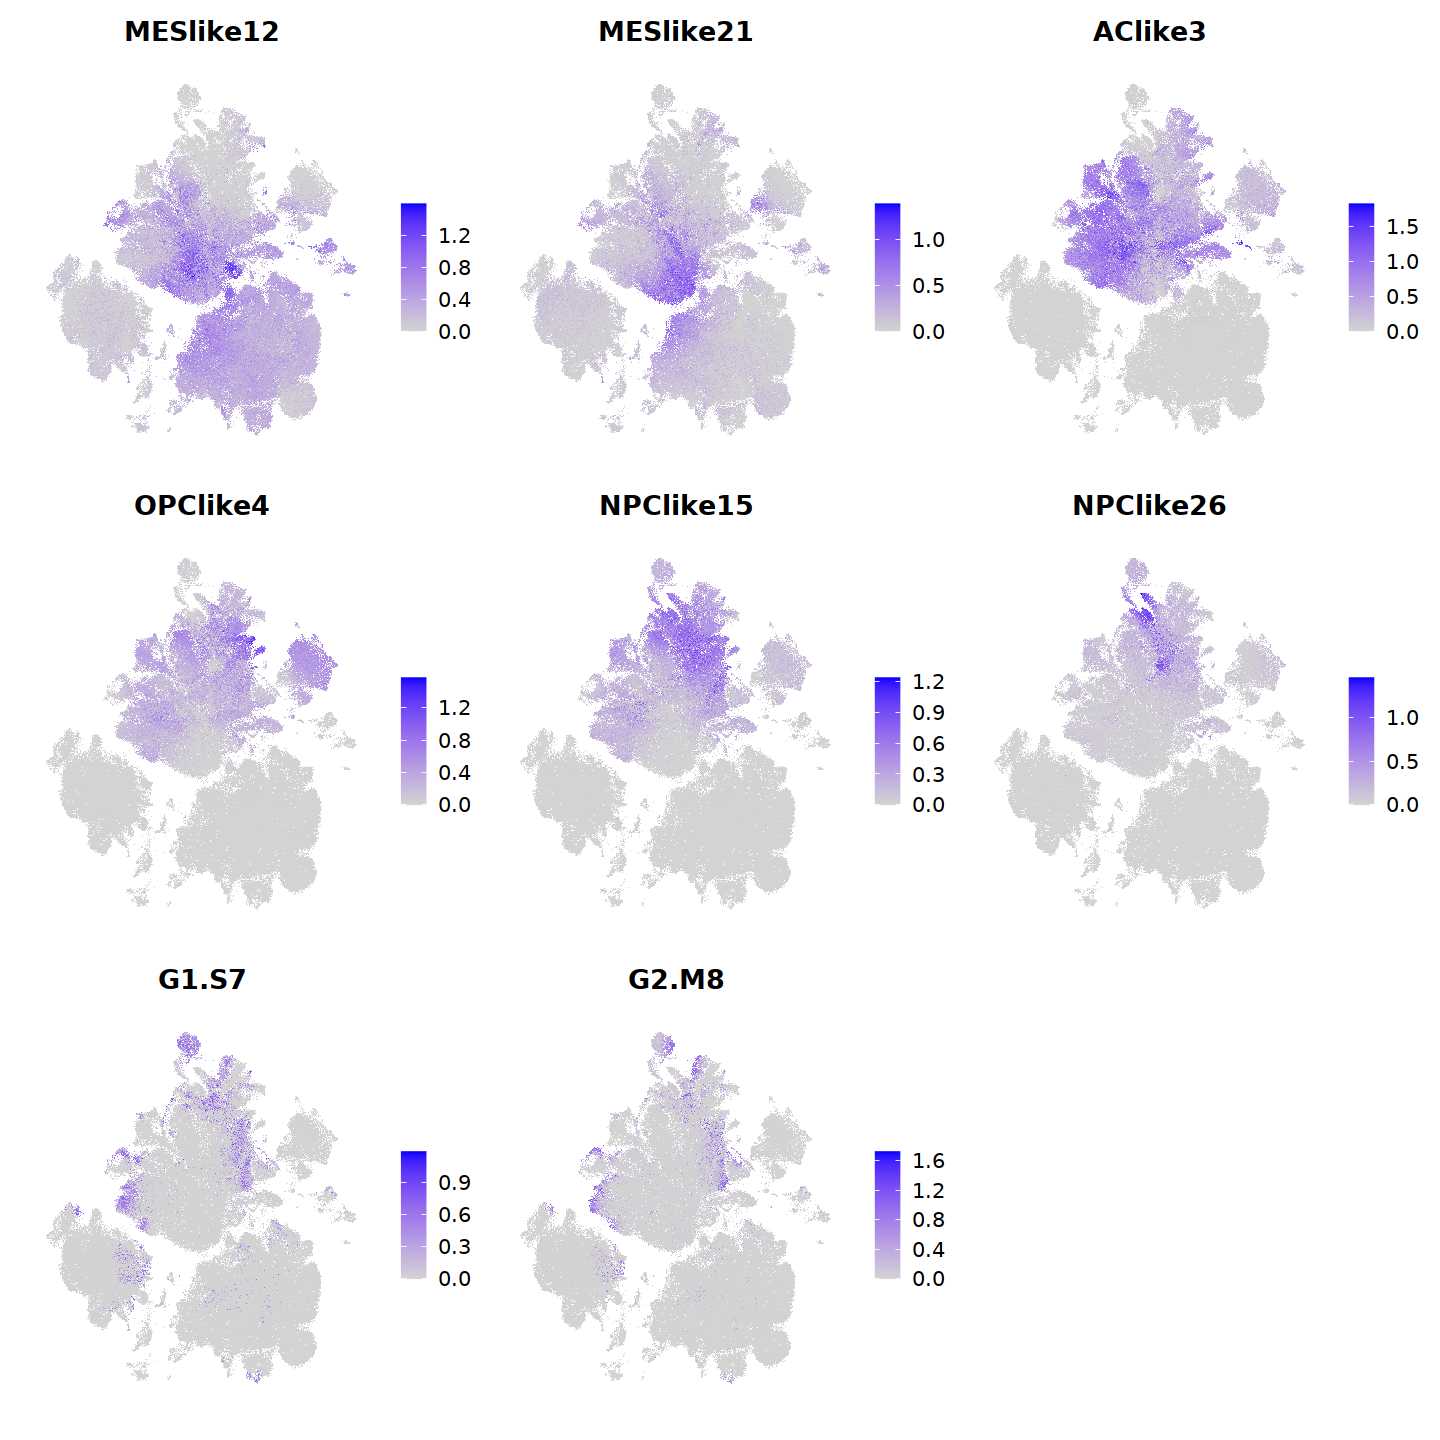

In [ ]:
reference <- AddModuleScore(object = reference,
                                       features =signatures.list,
                                       name = names(signatures.list)
                                      )
options(repr.plot.height = 12, repr.plot.width = 12)
FeaturePlot(reference, c('MESlike12', 'MESlike21', 'AClike3','OPClike4','NPClike15','NPClike26','G1.S7','G2.M8'), 
                      min.cutoff = 0, pt.size = 0.1) & NoAxes()

Define the different annotation levels (coarse to detail)

In [ ]:
reference$annotation_level_4 <- reference$detailed_cellstate

reference$annotation_level_3 <- Idents(reference)

reference$annotation_level_2 = recode(reference$annotation_level_3,
                                    `AC-like` = 'Differentiated-like',
                                       `MES-like` = "Differentiated-like",    
                                       `OPC-like` = "Stem-like", 
                                       `NPC-like` = "Stem-like",    
                                       `Astrocyte` = "Glial-Neuronal", 
                                       `Oligodendrocyte` = "Glial-Neuronal",    
                                       `OPC` = "Glial-Neuronal", 
                                       `RG` = "Glial-Neuronal",    
                                       `Neuron` = "Glial-Neuronal",
                                        `Mono` = "Myeloid",
                                       `TAM-BDM` = "Myeloid",    
                                       `TAM-MG` = "Myeloid", 
                                       `DC` = "Myeloid",    
                                       `Mast` = "Myeloid",
                                       `CD4/CD8` = "Lymphoid",    
                                       `NK` = "Lymphoid", 
                                       `B cell` = "Lymphoid",    
                                       `Plasma B` = "Lymphoid",
                                       `Endothelial` = "Vascular",    
                                       `Mural cell` = "Vascular"
                          )


reference$annotation_level_1 = recode(reference$annotation_level_2,
                                    `Differentiated-like` = 'Neoplastic',
                                       `Stem-like` = "Neoplastic",   
                                       `Glial-Neuronal` = "Non-neoplastic", 
                                        `Myeloid` = "Non-neoplastic",
                                       `Lymphoid` = "Non-neoplastic",    
                                       `Vascular` = "Non-neoplastic"
                          )

NULL

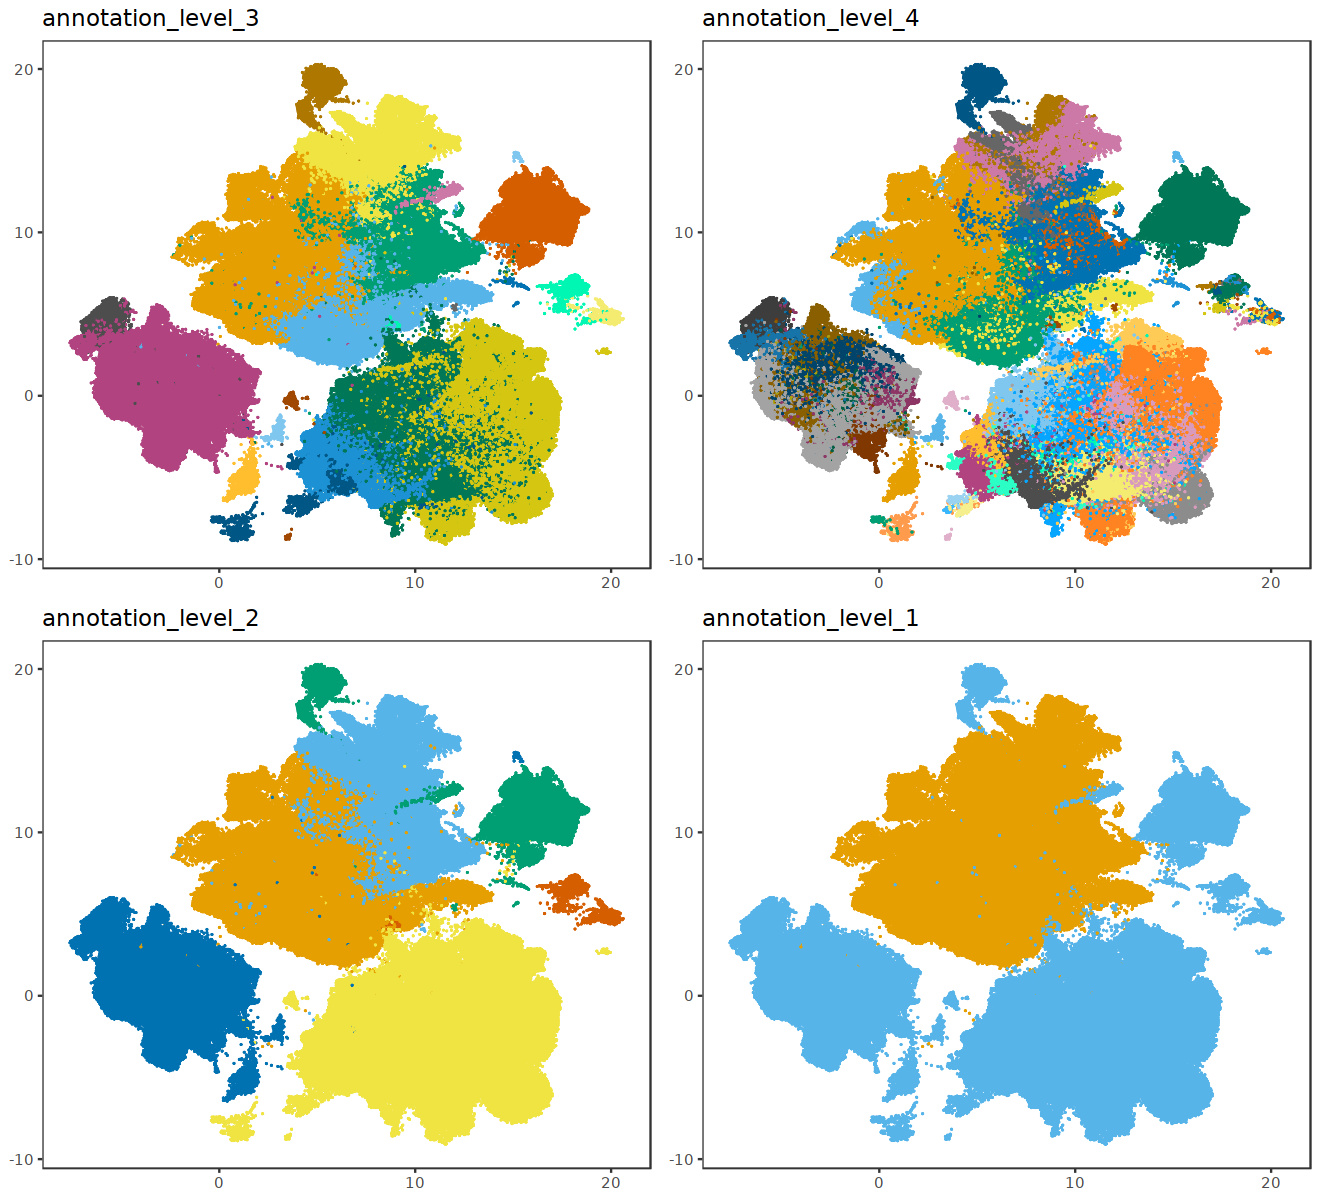

In [ ]:
multi_dittoDimPlot(reference, 
                   # order = 'randomize',
             reduction.use = "umap", var = c('annotation_level_1', 'annotation_level_2',
                                             'annotation_level_3', 'annotation_level_4'),
            do.raster = TRUE,
            size = 0.5) + NoAxes() 

In [ ]:
saveRDS(reference, 'data/core_GBmap.rds')

### Supp Table S4

In [ ]:
Idents(reference) <- reference$annotation_level_1
markers_level_1 <- FindAllMarkers(reference, only.pos = TRUE, min.pct = 0.5, logfc.threshold = 1)
markers_level_1
write.table(markers_level_1 %>%
    group_by(cluster) %>%
    slice_max(n = 50, order_by = avg_log2FC), 
            'data/markers_level_1.tsv', quote = FALSE, row.names = FALSE, col.names = TRUE, sep = '\t')

In [ ]:
Idents(reference) <- reference$annotation_level_2
markers_level_2 <- FindAllMarkers(reference, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 1)
markers_level_2
write.table(markers_level_2 %>%
    group_by(cluster) %>%
    slice_max(n = 50, order_by = avg_log2FC), 
            'data/markers_level_2.tsv', quote = FALSE, row.names = FALSE, col.names = TRUE, sep = '\t')

Calculating cluster Differentiated-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Stem-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Glial-Neuronal



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Myeloid



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Lymphoid



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Vascular



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


p_val         avg_log2FC pct.1 pct.2 p_val_adj     cluster            
CHI3L1   0             3.131460   0.529 0.121 0             Differentiated-like
SEC61G   0             3.027251   0.946 0.696 0             Differentiated-like
CLU      0             2.937256   0.955 0.324 0             Differentiated-like
MT3      0             2.659046   0.913 0.263 0             Differentiated-like
MT1X     0             2.487506   0.783 0.365 0             Differentiated-like
GFAP     0             2.432570   0.607 0.215 0             Differentiated-like
MT2A     0             2.402941   0.955 0.680 0             Differentiated-like
IGFBP5   0             2.280391   0.643 0.115 0             Differentiated-like
SPARCL1  0             2.162628   0.763 0.170 0             Differentiated-like
PTN      0             2.076432   0.922 0.284 0             Differentiated-like
EGFR     0             2.056744   0.637 0.145 0             Differentiated-like
FABP7    0             2.050762   0.797 0.207 0             Differentiated-like
IGFBP2   0             1.985765   0.790 0.192 0             Differentiated-like
CHCHD2   0             1.807387   0.935 0.828 0             Differentiated-like
CRYAB    0             1.800484   0.796 0.241 0             Differentiated-like
MIR9-1HG 0             1.723351   0.831 0.286 0             Differentiated-like
CNN3     0             1.603532   0.809 0.192 0             Differentiated-like
CST3     0             1.522924   0.938 0.742 0             Differentiated-like
PTPRZ1   0             1.520745   0.823 0.218 0             Differentiated-like
DBI      0             1.516686   0.939 0.773 0             Differentiated-like
CPE      0             1.505537   0.674 0.142 0             Differentiated-like
ID3      0             1.503256   0.407 0.166 0             Differentiated-like
LGALS3   0             1.480140   0.687 0.354 0             Differentiated-like
VIM      0             1.474574   0.966 0.746 0             Differentiated-like
HOPX     0             1.455549   0.566 0.170 0             Differentiated-like
GAP43    0             1.441533   0.679 0.179 0             Differentiated-like
IGFBP3   0             1.419877   0.387 0.057 0             Differentiated-like
PMP2     0             1.417699   0.656 0.181 0             Differentiated-like
HILPDA   0             1.363026   0.434 0.110 0             Differentiated-like
VEGFA    0             1.353030   0.533 0.200 0             Differentiated-like
⋮        ⋮             ⋮          ⋮     ⋮     ⋮             ⋮                  
HSPG2     0.000000e+00 1.278319   0.272 0.016  0.000000e+00 Vascular           
LAMC1     0.000000e+00 1.268066   0.597 0.082  0.000000e+00 Vascular           
TIMP3     0.000000e+00 1.266652   0.565 0.134  0.000000e+00 Vascular           
SLC38A5   0.000000e+00 1.240545   0.259 0.033  0.000000e+00 Vascular           
ABCG2     0.000000e+00 1.216698   0.345 0.016  0.000000e+00 Vascular           
INSR      0.000000e+00 1.205437   0.420 0.114  0.000000e+00 Vascular           
CCN11     0.000000e+00 1.187062   0.533 0.150  0.000000e+00 Vascular           
LHFPL6    0.000000e+00 1.183094   0.615 0.142  0.000000e+00 Vascular           
TSC22D1   0.000000e+00 1.179034   0.697 0.329  0.000000e+00 Vascular           
ADGRF5    0.000000e+00 1.171949   0.507 0.009  0.000000e+00 Vascular           
FLT1      0.000000e+00 1.171443   0.385 0.035  0.000000e+00 Vascular           
SPRY1     0.000000e+00 1.157682   0.625 0.196  0.000000e+00 Vascular           
ADGRL4    0.000000e+00 1.154160   0.289 0.005  0.000000e+00 Vascular           
TM4SF1    0.000000e+00 1.149798   0.444 0.088  0.000000e+00 Vascular           
C11orf96  0.000000e+00 1.143833   0.449 0.107  0.000000e+00 Vascular           
PRSS23    0.000000e+00 1.126737   0.475 0.067  0.000000e+00 Vascular           
ARHGAP29  0.000000e+00 1.116764   0.569 0.032  0.000000e+00 Vascular           
ATP1A2    0.000000e+00 1.113583   0.390 0.096  0.000000e+00 Vascular           
APP1     

In [ ]:
Idents(reference) <- reference$annotation_level_3
markers_level_3 <- FindAllMarkers(reference, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.5)
markers_level_3
write.table(markers_level_3 %>%
    group_by(cluster) %>%
    slice_max(n = 50, order_by = avg_log2FC), 
            'data/markers_level_3.tsv', quote = FALSE, row.names = FALSE, col.names = TRUE, sep = '\t')

Calculating cluster AC-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster MES-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster OPC-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster NPC-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Astrocyte



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Oligodendrocyte



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster OPC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Neuron



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster RG



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mono



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-BDM



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-MG



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster DC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mast



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster CD4/CD8



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster NK



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster B cell



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Plasma B



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mural cell



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Endothelial



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


p_val        avg_log2FC pct.1 pct.2 p_val_adj    cluster    
FABP7        0            2.240528   0.897 0.257 0            AC-like    
EGFR         0            2.189966   0.710 0.189 0            AC-like    
MT3          0            2.138910   0.947 0.332 0            AC-like    
GFAP         0            2.115721   0.669 0.249 0            AC-like    
PTN          0            2.077572   0.974 0.349 0            AC-like    
CHCHD2       0            2.057143   0.953 0.837 0            AC-like    
CLU          0            1.930411   0.955 0.397 0            AC-like    
CST3         0            1.908372   0.980 0.757 0            AC-like    
MIR9-1HG     0            1.747999   0.910 0.334 0            AC-like    
SEC61G       0            1.701306   0.938 0.726 0            AC-like    
DBI          0            1.664005   0.968 0.787 0            AC-like    
PTPRZ1       0            1.561025   0.914 0.271 0            AC-like    
CKB          0            1.550380   0.928 0.408 0            AC-like    
HOPX         0            1.534965   0.614 0.207 0            AC-like    
BCAN         0            1.517939   0.786 0.204 0            AC-like    
CRYAB        0            1.506622   0.781 0.308 0            AC-like    
NIPSNAP2     0            1.463146   0.664 0.318 0            AC-like    
ID3          0            1.448995   0.460 0.184 0            AC-like    
SPARCL1      0            1.432049   0.770 0.237 0            AC-like    
PMP2         0            1.380146   0.745 0.220 0            AC-like    
CNN3         0            1.354401   0.846 0.256 0            AC-like    
GPM6B        0            1.316225   0.926 0.349 0            AC-like    
NOVA1        0            1.294018   0.865 0.262 0            AC-like    
CCT6A        0            1.288911   0.722 0.473 0            AC-like    
AQP4         0            1.284572   0.593 0.089 0            AC-like    
IGFBP2       0            1.265359   0.818 0.256 0            AC-like    
VIM          0            1.224831   0.973 0.770 0            AC-like    
TTYH1        0            1.216625   0.681 0.153 0            AC-like    
RAMP1        0            1.210996   0.757 0.195 0            AC-like    
TUBB2B       0            1.207545   0.878 0.303 0            AC-like    
⋮            ⋮            ⋮          ⋮     ⋮     ⋮            ⋮          
SELENOM4     6.033282e-52 0.6022343  0.357 0.169 3.016641e-48 Endothelial
ENTPD1       7.887807e-51 0.6102486  0.401 0.206 3.943904e-47 Endothelial
KLF21        4.600455e-50 0.6094714  0.487 0.262 2.300228e-46 Endothelial
MT2A2        1.003171e-49 0.5505778  0.874 0.748 5.015854e-46 Endothelial
NRP2         2.611250e-49 0.6301264  0.373 0.184 1.305625e-45 Endothelial
MIR4435-2HG1 2.005095e-48 0.7916318  0.357 0.174 1.002547e-44 Endothelial
SLCO2B12     3.703831e-48 0.6642974  0.468 0.260 1.851915e-44 Endothelial
RBP13        1.355089e-45 0.5509968  0.467 0.253 6.775447e-42 Endothelial
UTRN         2.259573e-45 0.5148418  0.367 0.184 1.129787e-41 Endothelial
LBH1         2.778505e-44 0.5313067  0.303 0.132 1.389253e-40 Endothelial
TSPAN14      1.432335e-42 0.5512600  0.397 0.219 7.161673e-39 Endothelial
ETS21        1.653387e-42 0.5229325  0.431 0.240 8.266934e-39 Endothelial
PLPP11       7.510247e-42 0.5251643  0.302 0.140 3.755123e-38 Endothelial
JAM2         2.801790e-41 0.5061908  0.348 0.180 1.400895e-37 Endothelial
F2R1         4.038026e-41 0.6137402  0.281 0.127 2.019013e-37 Endothelial
ADM1         5.084883e-39 0.6136622  0.385 0.201 2.542442e-35 Endothelial
TSC22D32     8.206857e-37 0.5262154  0.657 0.493 4.103429e-33 Endothelial
JAG11        2.655208e-36 0.5347338  0.278 0.131 1.327604e-32 Endothelial
PMEPA11      1.891964e-33 0.5408256  0.311 0.163 9.459819e-30 Endothelial
CSTB2        1.710450e-32 0.5128164  0.722 0.674 8.552251e-29 Endothelial
TFRC1        2.466900e-30 0.6000561  0.368 0.222 1.233450e-26 Endothelial
CYTOR2       2.487048e-30 0.7033228  0.440 0.293 1.243524e-26 Endothelial
NEDD9        3.19

In [ ]:
Idents(reference) <- reference$annotation_level_4
markers_level_4 <- FindAllMarkers(reference, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
markers_level_4
write.table(markers_level_4 %>%
    group_by(cluster) %>%
    slice_max(n = 50, order_by = avg_log2FC), 
            'data/markers_level_4.tsv', quote = FALSE, row.names = FALSE, col.names = TRUE, sep = '\t')

Calculating cluster AC-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster AC-like Prolif



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster MES-like hypoxia/MHC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster MES-like hypoxia independent



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster OPC-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster OPC-like Prolif



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster NPC-like OPC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster NPC-like neural



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster NPC-like Prolif



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Astrocyte



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Oligodendrocyte



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster OPC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster RG



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Neuron



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mono naive



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mono anti-infl



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mono hypoxia



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-BDM hypoxia/MES



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-BDM MHC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-BDM INF



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-BDM anti-infl



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-MG aging sig



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-MG pro-infl I



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-MG pro-infl II



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster TAM-MG prolif



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster cDC1



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster cDC2



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster DC1



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster DC2



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster DC3



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Mast



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster CD8 cytotoxic



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster CD8 EM



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster CD8 NK sig



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster CD4 rest



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster CD4 INF



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Stress sig



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Reg T



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Prolif T



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster NK



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster B cell



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Plasma B



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster pDC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Endo capilar



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Endo arterial



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Tip-like



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Scavenging endothelial



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster SMC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster SMC COL



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster SMC prolif



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Pericyte



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Scavenging pericyte



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster Perivascular fibroblast



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


Calculating cluster VLMC



R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call
R_zmq_msg_send errno: 4 strerror: Interrupted system call


p_val        avg_log2FC pct.1 pct.2 p_val_adj  cluster gene    
GFAP       0            2.221049   0.701 0.249 0          AC-like GFAP    
FABP7      0            2.214629   0.892 0.266 0          AC-like FABP7   
MT3        0            2.101972   0.945 0.340 0          AC-like MT3     
EGFR       0            2.096273   0.693 0.199 0          AC-like EGFR    
PTN        0            1.987214   0.972 0.357 0          AC-like PTN     
CLU        0            1.966932   0.954 0.404 0          AC-like CLU     
CST3       0            1.925641   0.979 0.760 0          AC-like CST3    
CHCHD2     0            1.835627   0.951 0.839 0          AC-like CHCHD2  
MIR9-1HG   0            1.793339   0.911 0.342 0          AC-like MIR9-1HG
CRYAB      0            1.608215   0.790 0.313 0          AC-like CRYAB   
DBI        0            1.579308   0.966 0.790 0          AC-like DBI     
BCAN       0            1.562376   0.790 0.211 0          AC-like BCAN    
PTPRZ1     0            1.558051   0.912 0.280 0          AC-like PTPRZ1  
ID3        0            1.531646   0.475 0.185 0          AC-like ID3     
SEC61G     0            1.506779   0.934 0.729 0          AC-like SEC61G  
HOPX       0            1.492228   0.600 0.215 0          AC-like HOPX    
CKB        0            1.471746   0.923 0.416 0          AC-like CKB     
SPARCL1    0            1.469570   0.766 0.245 0          AC-like SPARCL1 
PMP2       0            1.436961   0.755 0.226 0          AC-like PMP2    
CNN3       0            1.387674   0.846 0.264 0          AC-like CNN3    
NIPSNAP2   0            1.362578   0.654 0.324 0          AC-like NIPSNAP2
AQP4       0            1.330138   0.597 0.095 0          AC-like AQP4    
GPM6B      0            1.327472   0.925 0.356 0          AC-like GPM6B   
NOVA1      0            1.290546   0.864 0.271 0          AC-like NOVA1   
TTYH1      0            1.244448   0.684 0.159 0          AC-like TTYH1   
IGFBP2     0            1.236733   0.809 0.265 0          AC-like IGFBP2  
S100B      0            1.224392   0.828 0.367 0          AC-like S100B   
RAMP1      0            1.220595   0.753 0.203 0          AC-like RAMP1   
VIM        0            1.214357   0.972 0.773 0          AC-like VIM     
TUBB2B     0            1.180379   0.873 0.312 0          AC-like TUBB2B  
⋮          ⋮            ⋮          ⋮     ⋮     ⋮          ⋮       ⋮       
TPPP37     6.188353e-06 0.3805048  0.277 0.123 0.03094177 VLMC    TPPP3   
QPRT3      7.585226e-06 0.4172822  0.277 0.134 0.03792613 VLMC    QPRT    
SREBF12    8.971362e-06 0.3869542  0.253 0.115 0.04485681 VLMC    SREBF1  
RAMP19     1.205189e-05 0.2951557  0.494 0.279 0.06025945 VLMC    RAMP1   
EPAS113    1.682613e-05 0.6261829  0.265 0.126 0.08413065 VLMC    EPAS1   
MYO611     1.899437e-05 0.2999530  0.337 0.174 0.09497183 VLMC    MYO6    
NEAT112    2.833298e-05 0.6479162  0.795 0.762 0.14166491 VLMC    NEAT1   
AK14       2.906159e-05 0.2718000  0.313 0.163 0.14530795 VLMC    AK1     
EMP316     3.049186e-05 0.3060470  0.687 0.473 0.15245928 VLMC    EMP3    
STOM12     3.307373e-05 0.3853808  0.458 0.296 0.16536863 VLMC    STOM    
TMSB4X18   3.834317e-05 0.3873341  1.000 0.994 0.19171585 VLMC    TMSB4X  
TPM114     3.920986e-05 0.5774865  0.349 0.208 0.19604930 VLMC    TPM1    
GRIA35     4.464179e-05 0.2574437  0.253 0.120 0.22320893 VLMC    GRIA3   
CYB5D23    4.674276e-05 0.2754066  0.289 0.149 0.23371381 VLMC    CYB5D2  
COMMD33    5.276852e-05 0.4128926  0.410 0.264 0.26384259 VLMC    COMMD3  
MSMO15     7.717515e-05 0.3931653  0.301 0.160 0.38587574 VLMC    MSMO1   
CTSD11     2.870401e-04 0.4851019  0.699 0.629 1.00000000 VLMC    CTSD    
WARS15     2.990037e-04 0.3041322  0.301 0.169 1.00000000 VLMC    WARS1   
NLRP14     4.882866e-04 0.3765108  0.361 0.228 1.00000000 VLMC    NLRP1   
ALDOC5     6.614725e-04 0.2537515  0.313 0.182 1.00000000 VLMC    ALDOC   
ALDH7A16   1.186547e-03 0.3336288  0.313 0.196 1.00000000 VLMC    ALDH7A1 
BEST13     1.807185e-03 0.7789411  0

Tables were arranged on one Excel sheet